In [31]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 1. Preprocessing data

In [32]:
data = pd.read_excel('Dataset Lomba Data Analytics TECHFEST 2025.xlsx')

data.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07


In [33]:
# cetak 5 baris data pertama
data.head(5)

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07


In [34]:
# cek informasi dataset : total kolom, total baris, tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 36 non-null     float64
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      34 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

In [35]:
# periksa banyaknya nilai null pada data tiap kolom
# format "null" != " null"
null_value = data.isnull().sum().to_frame()

null_value

,0
Provinsi,0
IPM,4
Pagu TKDD,1
Realisasi TKDD,1
Jumlah Penduduk,2
Anggaran APBN per kapita,3
Persentase Penduduk Miskin,4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,0
Produk Domestik Regional Bruto per Kapita HB,0
Laju Pertumbuhan PDRB atas dasar konstan 2010,0


In [36]:
data.columns

Index(['Provinsi', 'IPM', 'Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk',
       'Anggaran APBN per kapita', 'Persentase Penduduk Miskin',
       'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
       'Produk Domestik Regional Bruto per Kapita HB',
       'Laju Pertumbuhan PDRB atas dasar konstan 2010'],
      dtype='object')

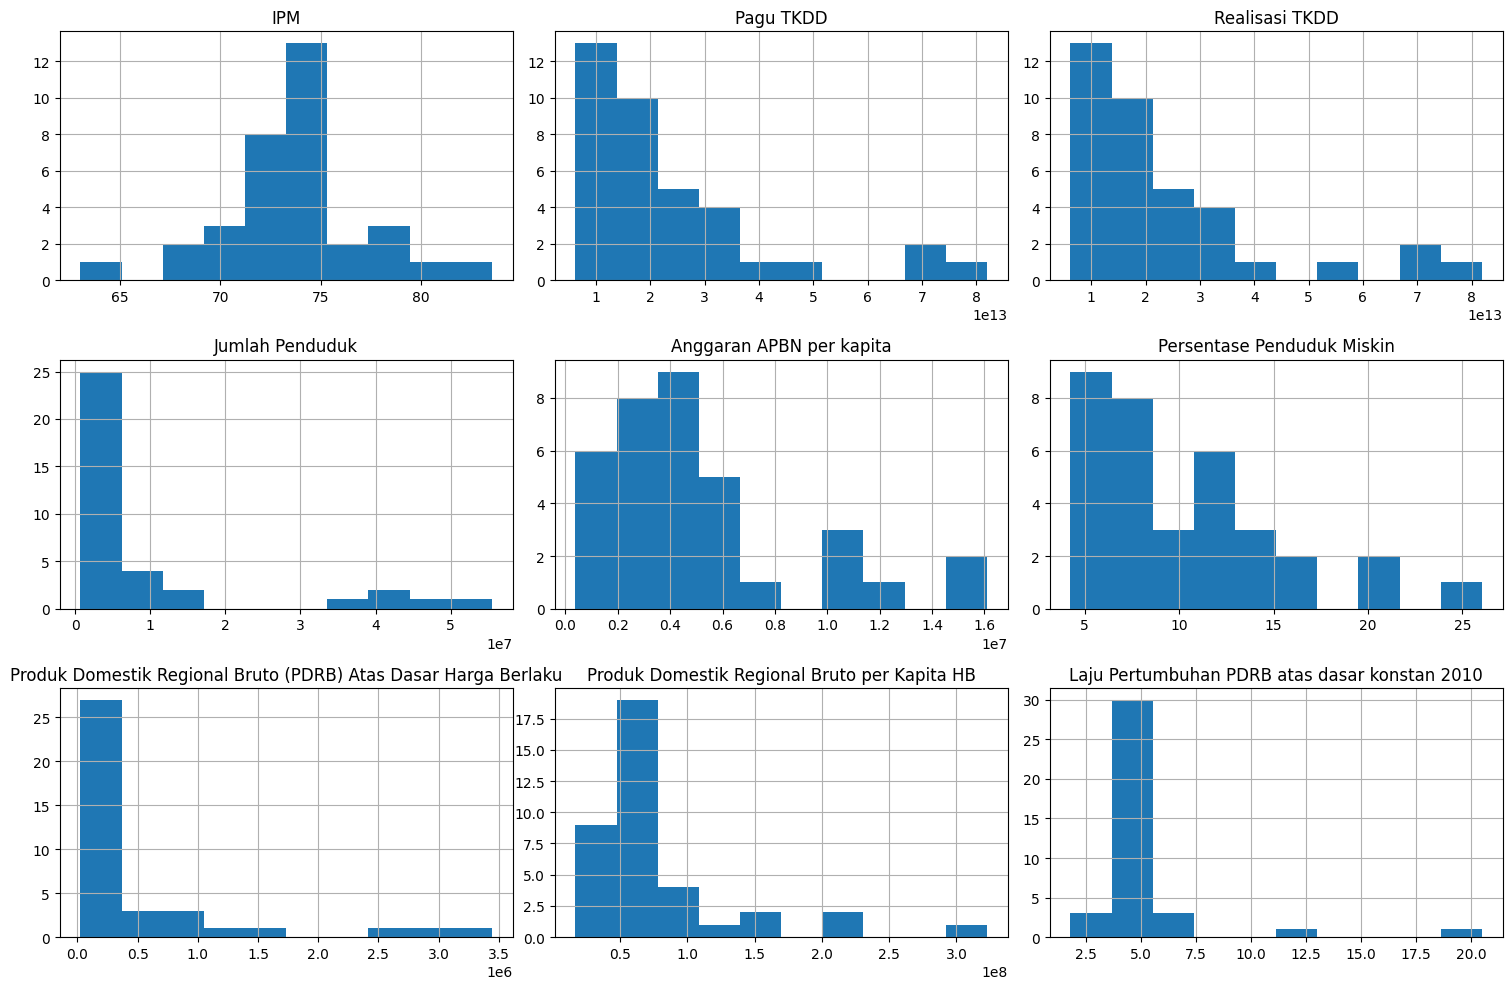

In [37]:
# histogram data untuk melihat distribusi data setiap kolom/variabel

data.hist(figsize=(15,10))

# menjaga layout tetap rapi tidak tumpang tindih
plt.tight_layout()

### Handling Missing value

#### 1. cek missing value

In [38]:
data_clean = data.copy()

null_value = data_clean.isnull().sum()


# 1. tampilkan kolom yang memiliki missing values
if null_value.any():
    print("Kolom yang memiliki missing values:\n")
    print(null_value[null_value > 0])
else:
    print("Tidak ada missing values dalam dataset")

Kolom yang memiliki missing values:

IPM                           4
Pagu TKDD                     1
Realisasi TKDD                1
Jumlah Penduduk               2
Anggaran APBN per kapita      3
Persentase Penduduk Miskin    4
dtype: int64


In [39]:
# cek sampel data value NA

data_clean[data_clean.isnull().any(axis=1)]
# data_clean[data_clean['Pagu TKDD'].isnull()]

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
25,PAPUA BARAT DAYA,NaN,1.016348e+13,1.013204e+13,6113520.0,1.657317e+06,NaN,36104.57,58450000,1.82
26,PAPUA PEGUNUNGAN,NaN,1.354314e+13,1.282176e+13,NaN,NaN,NaN,24433.99,16870000,4.78
27,PAPUA SELATAN,NaN,8.094830e+12,7.658020e+12,NaN,NaN,NaN,31357.75,58677000,4.23
28,PAPUA TENGAH,NaN,1.439523e+13,1.494127e+13,1351659.0,1.105402e+07,NaN,150377.18,103508000,5.95
34,SULAWESI UTARA,75.04,NaN,NaN,2660800.0,NaN,7.38,171969.42,64131000,5.48


- **Kolom berikut memuat nilai null :** 
    - IPM sebanyak 4 Provinsi :
        - PAPUA BARAT DAYA
        - PAPUA PEGUNUNGAN
        - PAPUA SELATAN
        - PAPUA TENGAH
    - Pagu TKDD sebanyak 1 Provinsi :
        - SULAWESI UTARA
    - Realisasi TKDD sebanyak  1 Provinsi :
        - SULAWESI UTARA
    - Jumlah Penduduk sebanyak 2 Provinsi :
        - PAPUA PEGUNUNGAN
        - PAPUA SELATAN
    - Anggaran APBN per kapita sebanyak 3 Provinsi:
        - PAPUA PEGUNUNGAN
        - PAPUA SELATAN
        - SULAWESI UTARA
    - Persentase Penduduk Miskin sebanyak 4 Provinsi :
        - PAPUA BARAT DAYA
        - PAPUA PEGUNUNGAN
        - PAPUA SELATAN
        - PAPUA TENGAH

In [40]:
# cek rata-rata dan standar deviasi tiap wilayah

data.groupby('Provinsi').describe()

IPM                                                \
                     count   mean std    min    25%    50%    75%    max   
Provinsi                                                                   
ACEH                   1.0  74.70 NaN  74.70  74.70  74.70  74.70  74.70   
BALI                   1.0  78.01 NaN  78.01  78.01  78.01  78.01  78.01   
BANTEN                 1.0  75.77 NaN  75.77  75.77  75.77  75.77  75.77   
BENGKULU               1.0  74.30 NaN  74.30  74.30  74.30  74.30  74.30   
DI YOGYAKARTA          1.0  81.09 NaN  81.09  81.09  81.09  81.09  81.09   
DKI JAKARTA            1.0  83.55 NaN  83.55  83.55  83.55  83.55  83.55   
GORONTALO              1.0  71.25 NaN  71.25  71.25  71.25  71.25  71.25   
JAMBI                  1.0  73.73 NaN  73.73  73.73  73.73  73.73  73.73   
JAWA BARAT             1.0  74.24 NaN  74.24  74.24  74.24  74.24  74.24   
JAWA TENGAH            1.0  73.39 NaN  73.39  73.39  73.39  73.39  73.39   
JAWA TIMUR             1.0  74.65 NaN  74.65  74.65  74.65  74.65  74.65   
KALIMANTAN BARAT       1.0  70.47 NaN  70.47  70.47  70.47  70.47  70.47   
KALIMANTAN SELATAN     1.0  74.66 NaN  74.66  74.66  74.66  74.66  74.66   
KALIMANTAN TENGAH      1.0  73.73 NaN  73.73  73.73  73.73  73.73  73.73   
KALIMANTAN TIMUR       1.0  78.20 NaN  78.20  78.20  78.20  78.20  78.20   
KALIMANTAN UTARA       1.0  72.88 NaN  72.88  72.88  72.88  72.88  72.88   
KEP. BANGKA BELITUNG   1.0  74.09 NaN  74.09  74.09  74.09  74.09  74.09   
KEP. RIAU              1.0  79.08 NaN  79.08  79.08  79.08  79.08  79.08   
LAMPUNG                1.0  72.48 NaN  72.48  72.48  72.48  72.48  72.48   
MALUKU                 1.0  72.75 NaN  72.75  72.75  72.75  72.75  72.75   
MALUKU UTARA           1.0  70.98 NaN  70.98  70.98  70.98  70.98  70.98   
NUSA TENGGARA BARAT    1.0  72.37 NaN  72.37  72.37  72.37  72.37  72.37   
NUSA TENGGARA TIMUR    1.0  68.40 NaN  68.40  68.40  68.40  68.40  68.40   
PAPUA                  1.0  63.01 NaN  63.01  63.01  63.01  63.01  63.01   
PAPUA BARAT            1.0  67.47 NaN  67.47  67.47  67.47  67.47  67.47   
PAPUA BARAT DAYA       0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
PAPUA PEGUNUNGAN       0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
PAPUA SELATAN          0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
PAPUA TENGAH           0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN   
RIAU                   1.0  74.95 NaN  74.95  74.95  74.95  74.95  74.95   
SULAWESI BARAT         1.0  69.80 NaN  69.80  69.80  69.80  69.80  69.80   
SULAWESI SELATAN       1.0  74.60 NaN  74.60  74.60  74.60  74.60  74.60   
SULAWESI TENGAH        1.0  71.66 NaN  71.66  71.66  71.66  71.66  71.66   
SULAWESI TENGGARA      1.0  72.94 NaN  72.94  72.94  72.94  72.94  72.94   
SULAWESI UTARA         1.0  75.04 NaN  75.04  75.04  75.04  75.04  75.04   
SUMATERA BARAT         1.0  75.64 NaN  75.64  75.64  75.64  75.64  75.64   
SUMATERA SELATAN       1.0  73.18 NaN  73.18  73.18  73.18  73.18  73.18   
SUMATERA UTARA         1.0  75.13 NaN  75.13  75.13  75.13  75.13  75.13   

                     Pagu TKDD                ...  \
                         count          mean  ...   
Provinsi                                      ...   
ACEH                       1.0  3.082148e+13  ...   
BALI                       1.0  1.115211e+13  ...   
BANTEN                     1.0  1.745338e+13  ...   
BENGKULU                   1.0  1.057008e+13  ...   
DI YOGYAKARTA              1.0  1.035587e+13  ...   
DKI JAKARTA                1.0  2.469499e+13  ...   
GORONTALO                  1.0  6.172420e+12  ...   
JAMBI                      1.0  1.523207e+13  ...   
JAWA BARAT                 1.0  7.132176e+13  ...   
JAWA TENGAH                1.0  6.712969e+13  ...   
JAWA TIMUR                 1.0  8.200830e+13  ...   
KALIMANTAN BARAT           1.0  2.079747e+13  ...   
KALIMANTAN SELATAN         1.0  3.163078e+13  ...   
KALIMANTAN TENGAH          1.0  2.769023e+13  ...   
KALIM

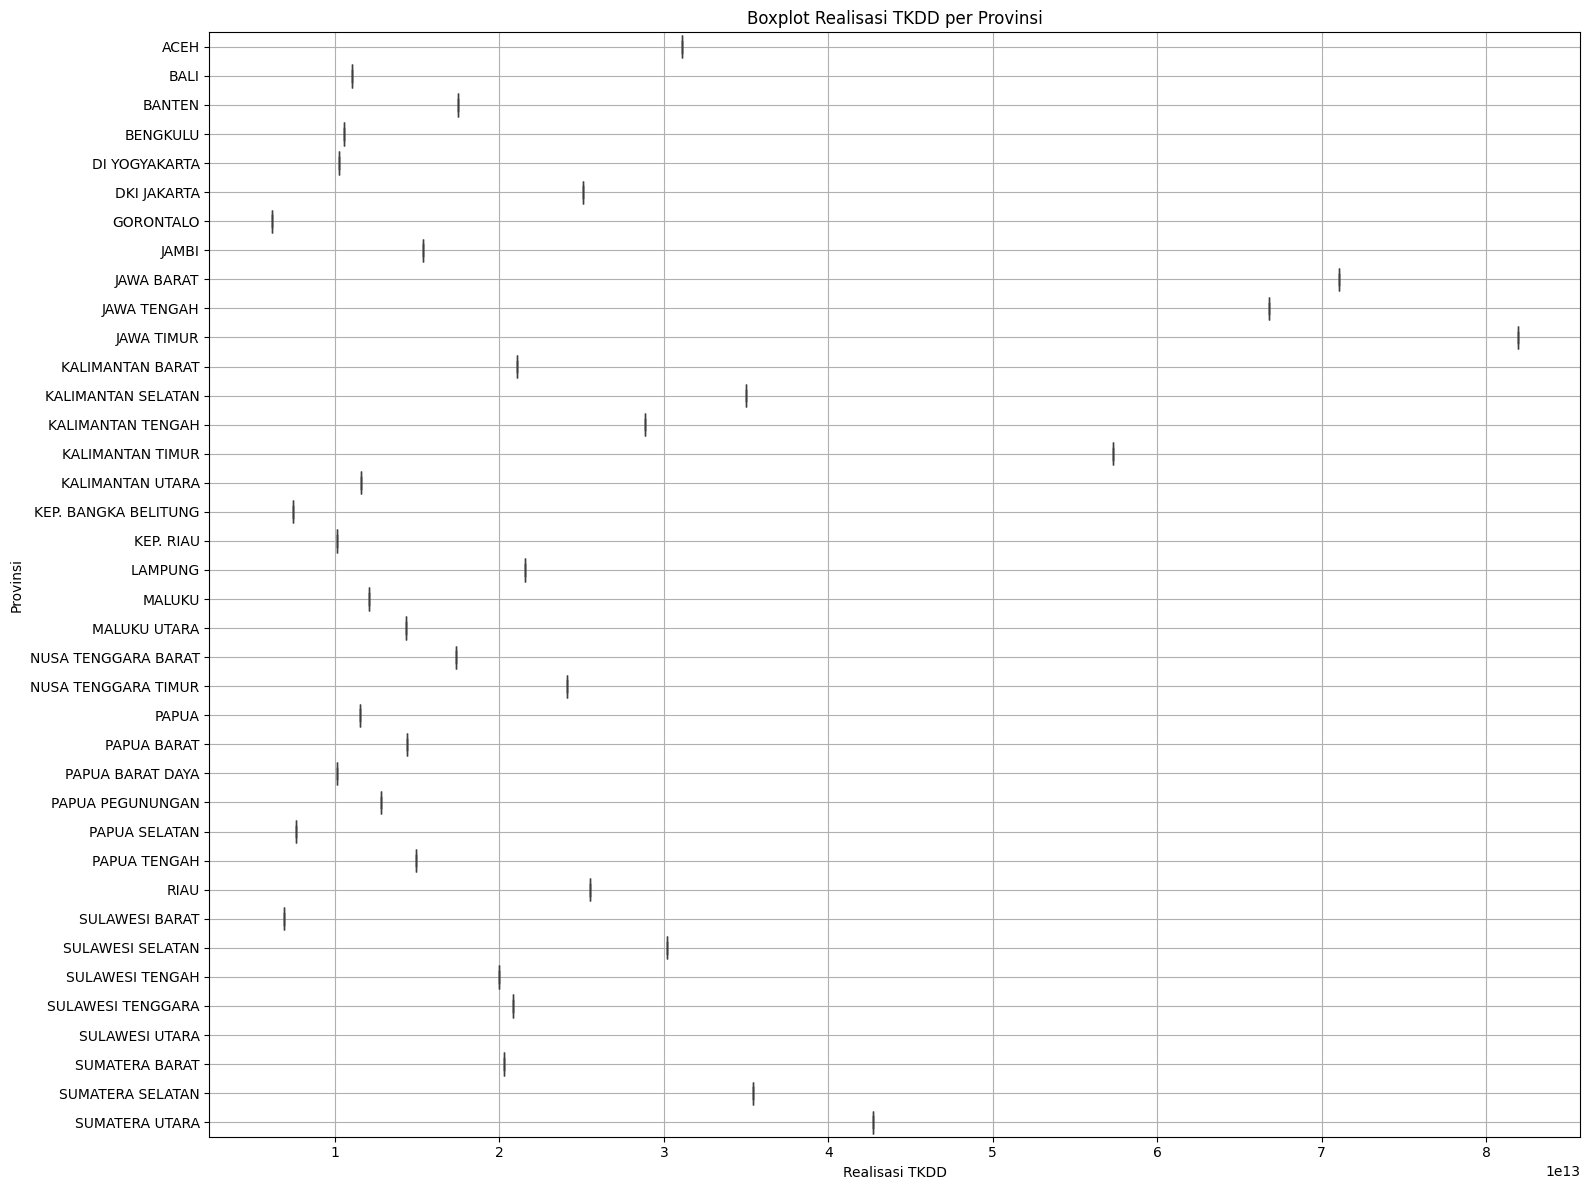

In [41]:
# variasi antar wilayah (median, sebaran, outlier)

plt.figure(figsize=(16,12))
sns.boxplot(y='Provinsi', x='Realisasi TKDD', data=data)

plt.title('Boxplot Realisasi TKDD per Provinsi')
plt.grid(True)
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

In [42]:
data[data['Provinsi'] == 'SULAWESI UTARA']['Realisasi TKDD'].isnull().sum()


np.int64(1)

In [43]:
filtered = data[data['Realisasi TKDD'] > 1e13]  # Bisa jadi Sulawesi Utara di bawah ambang ini
print(filtered)

               Provinsi    IPM     Pagu TKDD  Realisasi TKDD  Jumlah Penduduk  \
0                  ACEH  74.70  3.082148e+13    3.107456e+13        5409200.0   
1                  BALI  78.01  1.115211e+13    1.106498e+13        4374300.0   
2                BANTEN  75.77  1.745338e+13    1.746738e+13       12167000.0   
3              BENGKULU  74.30  1.057008e+13    1.055979e+13        2059400.0   
4         DI YOGYAKARTA  81.09  1.035587e+13    1.024129e+13        3712600.0   
5           DKI JAKARTA  83.55  2.469499e+13    2.508018e+13       10640000.0   
7                 JAMBI  73.73  1.523207e+13    1.535267e+13        3633200.0   
8            JAWA BARAT  74.24  7.132176e+13    7.103169e+13       49306800.0   
9           JAWA TENGAH  73.39  6.712969e+13    6.677206e+13       37180400.0   
10           JAWA TIMUR  74.65  8.200830e+13    8.192189e+13       41230000.0   
11     KALIMANTAN BARAT  70.47  2.079747e+13    2.109132e+13       55497000.0   
12   KALIMANTAN SELATAN  74.

- Median tidak sensitif terhadap outlier (jika ada nilai sangat tinggi seperti IPM Jakarta 83,.. dan sangat rendah seperti Papua 63,.. tidak menyimpang dari distribusi data asli)

- Distribusi realisasi TKDD tidak merata/ada variasi antar provinsi (provinsi jawa menerima alokasi lebih besar) sehingga untuk handling missing value bisa mempertimbangkan imputasi median per wilayah/pulau agar tidak bias

- berdasarkan sumber yang tertera dikatakan bahwa terdapat kondisi kemandirian fiskal yang berbeda-beda pada setiap daerah yang diklasifikasikan menjadi beberapa bagian yaitu belum mandiri, menuju kemandirian, mandiri, dan sangat mandiri. Hal ini menjadi dasar kami mengisi bagian yang kosong pada dataset dengan berdasar pada daerah yang ada di sekitarnya.[https://nextindonesia.id/Research/2025/03/20/57/Kreativitas-Pemprov-Menambal-Anggaran]


#### 2. Handling missing value dengan median

##### > Median data Nasional/keseluruhan

In [44]:
# handle missing value dengan fillna dengan nilai median dari seluruh data(nasional/median dari seluruh daerah di Indonesia)
data_nasional = data.copy()

cols_to_impute_median = [
    'IPM',
    'Pagu TKDD',
    'Realisasi TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin'
]

# data median (nilai tengah) 
for col in cols_to_impute_median:
    if data_nasional[col].isnull().any():
        median_val = data_nasional[col].median()
        data_nasional[col]=data_nasional[col].fillna(median_val)
        print(f"Kolom '{col}' : Missing value dengan median {median_val}")

    else:
        print(f"Kolom '{col}' : Tidak ada missing value")

Kolom 'IPM' : Missing value dengan median 73.91
Kolom 'Pagu TKDD' : Missing value dengan median 17453380000000.0
Kolom 'Realisasi TKDD' : Missing value dengan median 17467380000000.0
Kolom 'Jumlah Penduduk' : Missing value dengan median 4402000.0
Kolom 'Anggaran APBN per kapita' : Missing value dengan median 4225660.575
Kolom 'Persentase Penduduk Miskin' : Missing value dengan median 8.425


##### > Median data per daerah yang null *(ini yang dipilih untuk dianalisis lebih lanjut)*

1. IPM : 4 missing value(dari wilayah Papua)

In [45]:
# mencari nilai median untuk mengisi data IPM null di daerah Papua

# median IPM papua untuk mengisi missing value pada kolom IPM khusus daerah papua
ipm_papua = data_clean[data_clean['Provinsi'].isin(['PAPUA', 'PAPUA BARAT'])]['IPM'].median()
print(f"Nilai median IPM daerah Papua: {ipm_papua}")

# melakukan mapping terhadap daerah Papua yang mengandung nilai null pada bagian IPM

# ada 4 IPM yang bernilai null (semuanya dari daerah Papua)
papua_ipm_null = [
    'PAPUA BARAT DAYA',
    'PAPUA PEGUNUNGAN',
    'PAPUA SELATAN',
    'PAPUA TENGAH'
]

# 
data_clean['IPM'] = data_clean.apply(
    lambda row: ipm_papua if pd.isnull(row['IPM']) and row['Provinsi'] in papua_ipm_null else row['IPM'],
    axis=1
)

Nilai median IPM daerah Papua: 65.24


2. Pagu TKDD : 1 missing value (sulawesi)

In [46]:
# mencari nilai median untuk mengisi data Pagu_TKDD di Sulawesi Utara
pagu_sulawesi = data_clean[data_clean['Provinsi'].isin(['GORONTALO','SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA'])]['Pagu TKDD'].median()
print(f"Nilai median Pagu TKDD daerah Sulawesi: {pagu_sulawesi}")

# melakukan mapping terhadap daerah Sulawesi yang mengandung nilai null pada kolom Pagu_TKDD
sulawesi_pagu_null = [
    'SULAWESI UTARA'
]

data_clean['Pagu TKDD'] = data_clean.apply(
    lambda row: pagu_sulawesi if pd.isnull(row['Pagu TKDD']) and row['Provinsi'] in sulawesi_pagu_null else row['Pagu TKDD'],
    axis=1
)


Nilai median Pagu TKDD daerah Sulawesi: 19749320000000.0


3. Realisasi TKDD : 1 missing value(Sulawesi)

In [47]:
# mencari nilai median untuk mengisi data Realisasi TKDD null di daerah Sulawesi
realisasi_sulawesi = data_clean[data_clean['Provinsi'].isin(['GORONTALO','SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA'])]['Realisasi TKDD'].median()
print(f"Nilai median Realisasi TKDD daerah Sulawesi: {realisasi_sulawesi}")

# melakukan mapping terhadap daerah Sulawesi yang mengandung nilai null pada kolom Realisasi TKDD
sulawesi_realisasi_null = [
    'SULAWESI UTARA'
]

data_clean['Realisasi TKDD'] = data_clean.apply(
    lambda row: realisasi_sulawesi if pd.isnull(row['Realisasi TKDD']) and row['Provinsi'] in sulawesi_realisasi_null else row['Realisasi TKDD'],
    axis=1
)

Nilai median Realisasi TKDD daerah Sulawesi: 19947410000000.0


4. Jumlah Penduduk : 2 missing value (Papua)

In [48]:
# mencari nilai median untuk mengisi data Jumlah_Penduduk null di daerah Papua
penduduk_papua = data_clean[data_clean['Provinsi'].isin(['PAPUA', 'PAPUA BARAT', 'PAPUA BARAT DAYA', 'PAPUA TENGAH'])]['Jumlah Penduduk'].median()
print(f"Nilai median Jumlah_Penduduk daerah Papua: {penduduk_papua}")

# melakukan mapping terhadap daerah Papua yang mengandung nilai null pada kolom Jumlah_Penduduk
penduduk_papua_null = [
    'PAPUA PEGUNUNGAN',
    'PAPUA SELATAN'
]

# mengisi bagian kolom Jumlah_Penduduk pada daerah Papua yang berisi nilai null
data_clean['Jumlah Penduduk'] = data_clean.apply(
    lambda row: penduduk_papua if pd.isnull(row['Jumlah Penduduk']) and row['Provinsi'] in penduduk_papua_null else row['Jumlah Penduduk'],
    axis=1
)

# untuk mengubah tipe data Jumlah_Penduduk ke dalam bentuk integer
data_clean['Jumlah Penduduk'] = data_clean['Jumlah Penduduk'].round().astype('Int64')

Nilai median Jumlah_Penduduk daerah Papua: 2890679.5


5. Anggaran APBN : 3 missing value(papua, sulawesi)

In [49]:
# mencari nilai median untuk mengisi data Anggaran APBN per kapita null di daerah Papua
apbn_papua = data_clean[data_clean['Provinsi'].isin(['PAPUA', 'PAPUA BARAT', 'PAPUA BARAT DAYA', 'PAPUA TENGAH'])]['Anggaran APBN per kapita'].median()
print(f"Nilai median Anggaran APBN per kapita daerah Papua: {apbn_papua}")

# melakukan mapping terhadap daerah Papua yang mengandung nilai null pada kolom Anggaran APBN per kapita
apbn_papua_null = [
    'PAPUA PEGUNUNGAN',
    'PAPUA SELATAN'
]

# mengisi bagian kolom Anggaran APBN per kapita pada daerah Papua yang berisi nilai null
data_clean['Anggaran APBN per kapita'] = data_clean.apply(
    lambda row: apbn_papua if pd.isnull(row['Anggaran APBN per kapita']) and row['Provinsi'] in penduduk_papua_null else row['Anggaran APBN per kapita'],
    axis=1
)


#############

# mencari nilai median untuk mengisi data Anggaran APBN per kapita di Sulawesi Utara
apbn_sulawesi = data_clean[data_clean['Provinsi'].isin(['GORONTALO','SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA'])]['Anggaran APBN per kapita'].median()
print(f"Nilai median Anggaran APBN per kapita daerah Sulawesi: {apbn_sulawesi}")

# melakukan mapping terhadap daerah Sulawesi yang mengandung nilai null pada kolom Anggaran APBN per kapita
apbn_sulawesi_null = [
    'SULAWESI UTARA'
]

data_clean['Anggaran APBN per kapita'] = data_clean.apply(
    lambda row: apbn_sulawesi if pd.isnull(row['Anggaran APBN per kapita']) and row['Provinsi'] in apbn_sulawesi_null else row['Anggaran APBN per kapita'],
    axis=1
)

Nilai median Anggaran APBN per kapita daerah Papua: 6827139.168
Nilai median Anggaran APBN per kapita daerah Sulawesi: 5136356.809


6. Persentase penduduk miskin : 4 missing value(Papua)

In [50]:
# mencari nilai median untuk mengisi data Persentase Penduduk Miskin null di daerah Papua
penduduk_miskin_papua = data_clean[data_clean['Provinsi'].isin(['PAPUA', 'PAPUA BARAT'])]['Persentase Penduduk Miskin'].median()
print(f"Nilai median Persentase Penduduk Miskin daerah Papua: {penduduk_miskin_papua:.2f}")


# melakukan mapping terhadap daerah Papua yang mengandung nilai null pada bagian Persentase Penduduk Miskin
penduduk_miskin_papua_null = [
    'PAPUA BARAT DAYA',
    'PAPUA PEGUNUNGAN',
    'PAPUA SELATAN',
    'PAPUA TENGAH'
]

data_clean['Persentase Penduduk Miskin'] = data_clean.apply(
    lambda row: penduduk_miskin_papua if pd.isnull(row['Persentase Penduduk Miskin']) and row['Provinsi'] in penduduk_miskin_papua_null else row['Persentase Penduduk Miskin'],
    axis=1
)

Nilai median Persentase Penduduk Miskin daerah Papua: 23.26


#### 3. Cek data setelah cleaning

In [51]:
data_clean.isnull().sum()

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

array([[<Axes: title={'center': 'IPM'}>,
        <Axes: title={'center': 'Pagu TKDD'}>,
        <Axes: title={'center': 'Realisasi TKDD'}>],
       [<Axes: title={'center': 'Jumlah Penduduk'}>,
        <Axes: title={'center': 'Anggaran APBN per kapita'}>,
        <Axes: title={'center': 'Persentase Penduduk Miskin'}>],
       [<Axes: title={'center': 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku'}>,
        <Axes: title={'center': 'Produk Domestik Regional Bruto per Kapita HB'}>,
        <Axes: title={'center': 'Laju Pertumbuhan PDRB atas dasar konstan 2010'}>]],
      dtype=object)

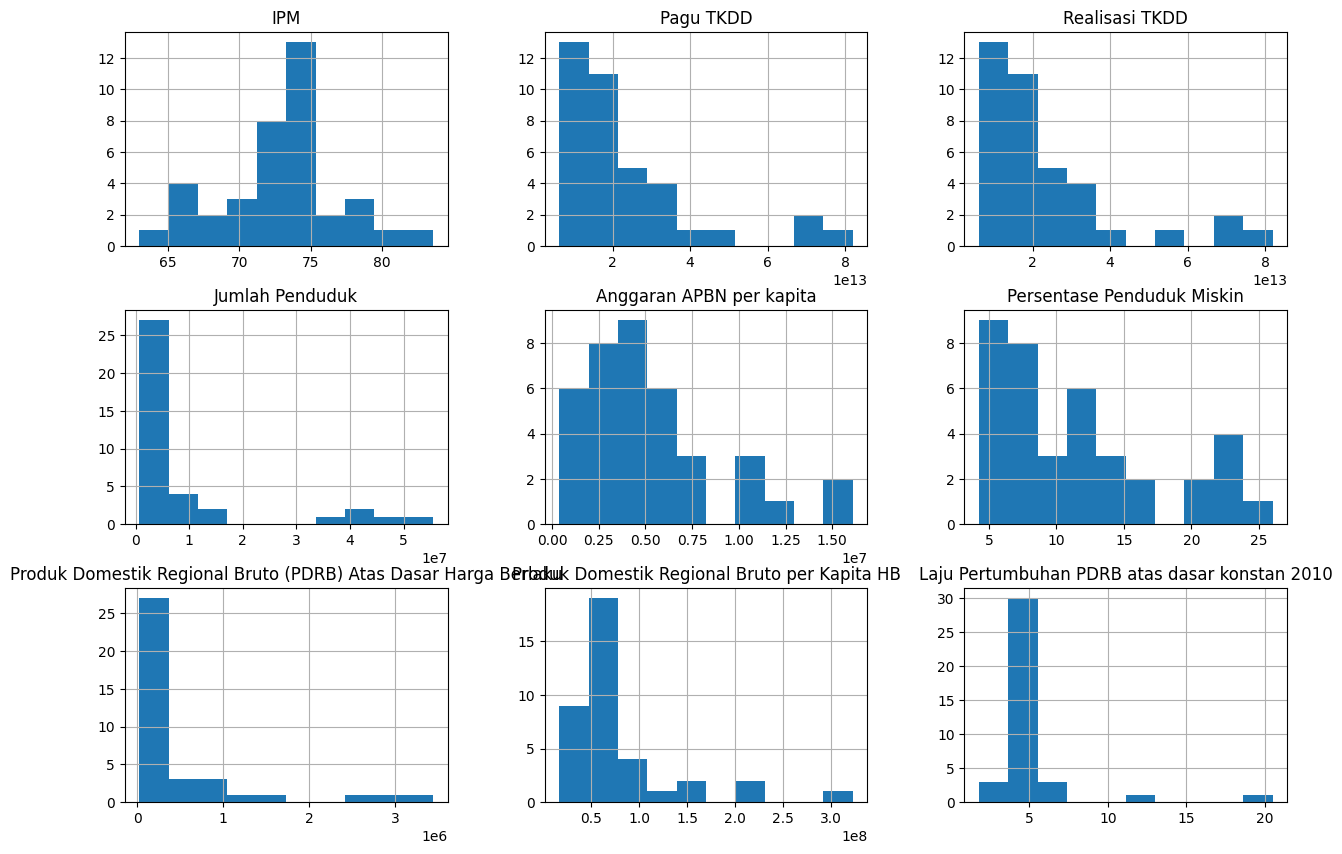

In [52]:
data_clean.hist(figsize=(15,10))


## 2. Perbandingan Pagu TKDD dengan Realisasi TKDD nya 


In [53]:
from IPython.display import display
# 1. efisiensi penyerapan anggaran (seberapa besar realisasi dana Pagu berhasil diterapkan)
data_clean['Persentase Realisasi (%)'] = (data_clean['Realisasi TKDD'] / data_clean['Pagu TKDD']) * 100

# 2. Statistik deskriptif dalam bentuk tabel
desc_pagu = data_clean['Pagu TKDD'].describe().to_frame(name='Pagu TKDD')
desc_realisasi = data_clean['Realisasi TKDD'].describe().to_frame(name='Realisasi TKDD')
desc_persen = data_clean['Persentase Realisasi (%)'].describe().to_frame(name='Persentase Realisasi (%)')

# Gabungkan ketiganya
desc_all = pd.concat([desc_pagu, desc_realisasi, desc_persen], axis=1)
display(desc_all)

,Pagu TKDD,Realisasi TKDD,Persentase Realisasi (%)
count,3.800000e+01,3.800000e+01,38.000000
mean,2.334332e+13,2.370547e+13,101.105562
std,1.799544e+13,1.828688e+13,3.666671
min,6.172420e+12,6.155410e+12,94.322171
25%,1.139729e+13,1.153708e+13,99.451484
50%,1.860135e+13,1.870740e+13,100.047994
75%,2.694142e+13,2.802721e+13,101.781463
max,8.200830e+13,8.192189e+13,110.981466


- Jumlah data(count) = 38 data dari tiap provinsi di Indonesia
- Rata-rata(mean):
    - Pagu TKDD : sekitar 23, 33 triliun
    - Realisasi TKDD : sekitar 23,37 triliun
    - Persentase realisasi : 101.105% dan maksimum realisasi 110.98%
    - Rata-rata dana realisasi TKDD melebihi alokasi pagu(batas maksimum dana untuk pembangunan) 

- Standar deviasi(std):
    - Persentase realisasi relatif kecil(3.67%) menunjukkan sebagian besar persentase realisasi persebarannya terkumpul disekitar rata-rata

- Realisasi terendah 94.32% menunjukkan tidak ada penyerapan sangat rendah atau dibawah target


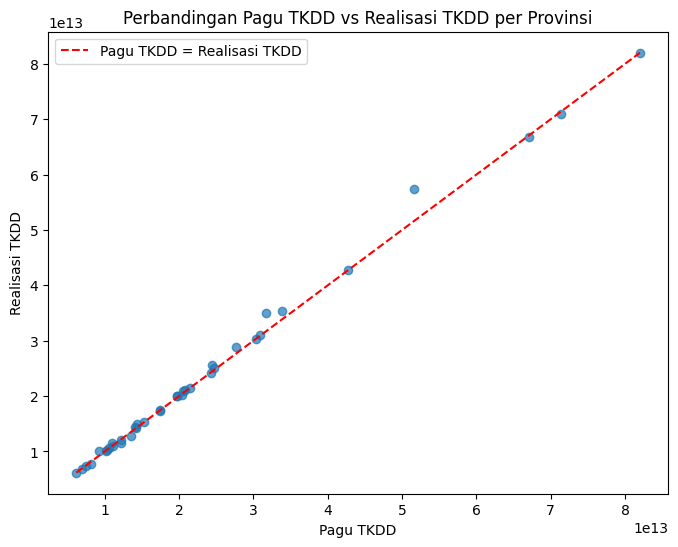

In [54]:
# 3. Visualisasi scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data_clean['Pagu TKDD'], data_clean['Realisasi TKDD'], alpha=0.7)

# garis mencangkup seluruh rentang data sehingga mudah membandingkan posisi tiap provinsi
# garis acuran ideal pagu TKDD
plt.plot([data_clean['Pagu TKDD'].min(), data_clean['Pagu TKDD'].max()],
         [data_clean['Pagu TKDD'].min(), data_clean['Pagu TKDD'].max()],
         'r--', label= 'Pagu TKDD = Realisasi TKDD')

plt.xlabel('Pagu TKDD')
plt.ylabel('Realisasi TKDD')
plt.title('Perbandingan Pagu TKDD vs Realisasi TKDD per Provinsi')
plt.legend()
plt.show()

- titik diatas garis : realisasi lebih besar daripada dana Pagu TKDD yang diterapkan (overbudget)
- titik dibawah garis : realisasi lebih kecil daripada dana Pagu TKDD yang diterapkan (anggaran tidak terserap penuh)

## 3. Menghitung persentase realisasi TKDD dari tiap provinsi dan mengklasifikasikannya menjadi 3 kategori:
- Dibawah 90%
- Berada diantara 90-100%
- Diatas 100%


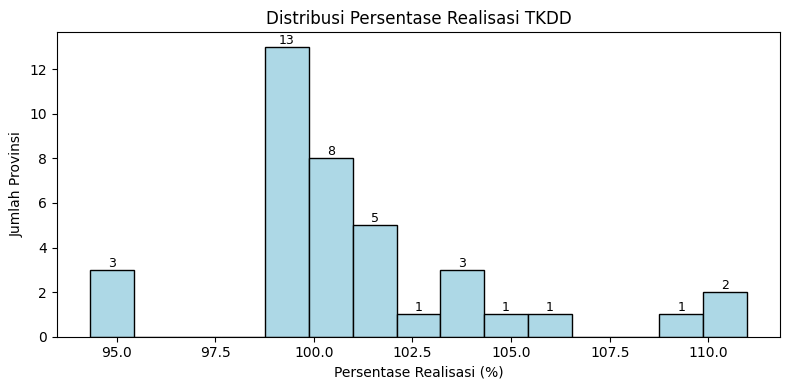

In [55]:
# 4. Visualisasi distribusi persentase realisasi
plt.figure(figsize=(8,4))
counts, bins, patches=plt.hist(data_clean['Persentase Realisasi (%)'], bins=15, color='lightblue', edgecolor='black')
plt.xlabel('Persentase Realisasi (%)')
plt.ylabel('Jumlah Provinsi')
plt.title('Distribusi Persentase Realisasi TKDD')
# plt.tight_layout()
# plt.show()

# Tambahkan label jumlah provinsi di atas tiap bar
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        plt.text((bin_left + bin_right)/2, count, int(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

- Distribusi Persentase Realisasi TKDD tersebut menunjukkan mayoritas provinsi dapat menyerap anggaran TKDD dengan optimal(jumlah provinsi terbanyak pada rentang 97.5 - 107.5) 

In [56]:

# 5. Tampilkan provinsi dengan serapan tertinggi & terendah
top_serapan = data_clean.sort_values('Persentase Realisasi (%)', ascending=False).head(5)
low_serapan = data_clean.sort_values('Persentase Realisasi (%)').head(5)

print("\n5 Provinsi dengan serapan TKDD tertinggi:")
top_serapan[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD', 'Persentase Realisasi (%)']]




5 Provinsi dengan serapan TKDD tertinggi:


,Provinsi,Pagu TKDD,Realisasi TKDD,Persentase Realisasi (%)
14,KALIMANTAN TIMUR,5.164347e+13,5.731468e+13,110.981466
12,KALIMANTAN SELATAN,3.163078e+13,3.498028e+13,110.589369
17,KEP. RIAU,9.246690e+12,1.015074e+13,109.777012
15,KALIMANTAN UTARA,1.099441e+13,1.159327e+13,105.446950
36,SUMATERA SELATAN,3.386521e+13,3.543317e+13,104.630002


In [57]:
print("\n5 Provinsi dengan serapan TKDD terendah:")
low_serapan[['Provinsi', 'Pagu TKDD', 'Realisasi TKDD', 'Persentase Realisasi (%)']]


5 Provinsi dengan serapan TKDD terendah:


,Provinsi,Pagu TKDD,Realisasi TKDD,Persentase Realisasi (%)
23,PAPUA,1.221171e+13,1.151835e+13,94.322171
27,PAPUA SELATAN,8.094830e+12,7.658020e+12,94.603840
26,PAPUA PEGUNUNGAN,1.354314e+13,1.282176e+13,94.673466
4,DI YOGYAKARTA,1.035587e+13,1.024129e+13,98.893574
35,SUMATERA BARAT,2.042998e+13,2.026070e+13,99.171414


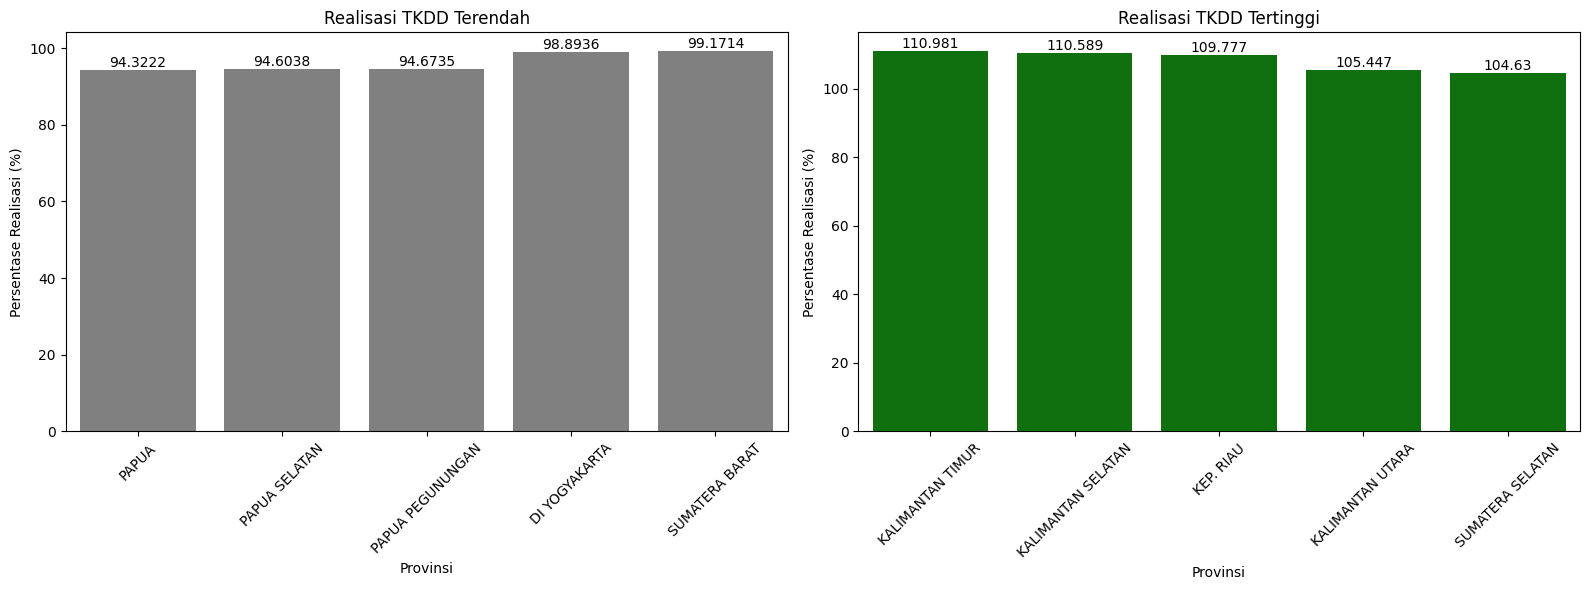

In [58]:
# efektivitas penyerapan anggaran
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom


# Barplot serapan terendah
sns.barplot(ax=axes[0], x=low_serapan['Provinsi'], y=low_serapan['Persentase Realisasi (%)'], color='gray')
axes[0].set_title("Realisasi TKDD Terendah")
axes[0].set_ylabel("Persentase Realisasi (%)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(axes[0].containers[0])

# Barplot serapan tertinggi
sns.barplot(ax=axes[1], x=top_serapan['Provinsi'], y=top_serapan['Persentase Realisasi (%)'], color='green')
axes[1].set_title("Realisasi TKDD Tertinggi")
axes[1].set_ylabel("Persentase Realisasi (%)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].bar_label(axes[1].containers[0])

# Tata letak
plt.tight_layout()
plt.show()


- Papua memiliki realisasi TKDD terendah karena Anggaran pemerintah kabupaten/kota maupun provinsi di wilayah provinsi Papua
masih mengandalkan dana transfer pusat atau dana perimbangan.[https://www.scribd.com/document/743688007/Kajian-IlmiahKinerja-Keuangan-terhadap-IPM-Siti-dkk]

In [59]:
# klasifikasi jd 3 kategori

def category_realization(persentase):
    if persentase < 90:
        return 'Dibawah 90%'
    elif persentase <=100:
        return '90-100%'
    else:
        return 'Diatas 100%'
    
data_clean['Kategori Realisasi'] = data_clean['Persentase Realisasi (%)'].apply(category_realization)


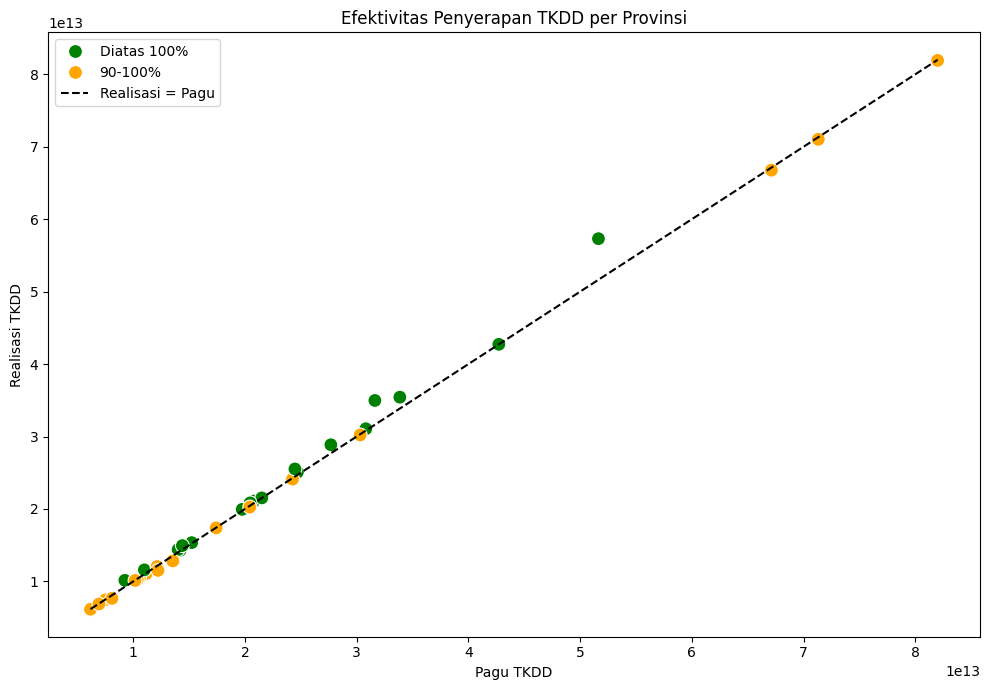

In [60]:
plt.figure(figsize=(10,7))
ax=sns.scatterplot(
    data=data_clean,
    x='Pagu TKDD',
    y='Realisasi TKDD',
    hue='Kategori Realisasi',
    palette={'Dibawah 90%':'red', '90-100%':'orange', 'Diatas 100%':'green'},
    s=100
)
plt.plot([data_clean['Pagu TKDD'].min(), data_clean['Pagu TKDD'].max()],
         [data_clean['Pagu TKDD'].min(), data_clean['Pagu TKDD'].max()],
         'k--', label='Realisasi = Pagu')
plt.xlabel('Pagu TKDD')
plt.ylabel('Realisasi TKDD')
plt.title('Efektivitas Penyerapan TKDD per Provinsi')
plt.legend()

# # label provinsi untuk melihat persebaran
# for i, row in data_clean.iterrows():
#     ax.text(row['Pagu TKDD'], row['Realisasi TKDD'], row['Provinsi'], alpha=0.7, fontsize=8)

plt.tight_layout()
plt.show()

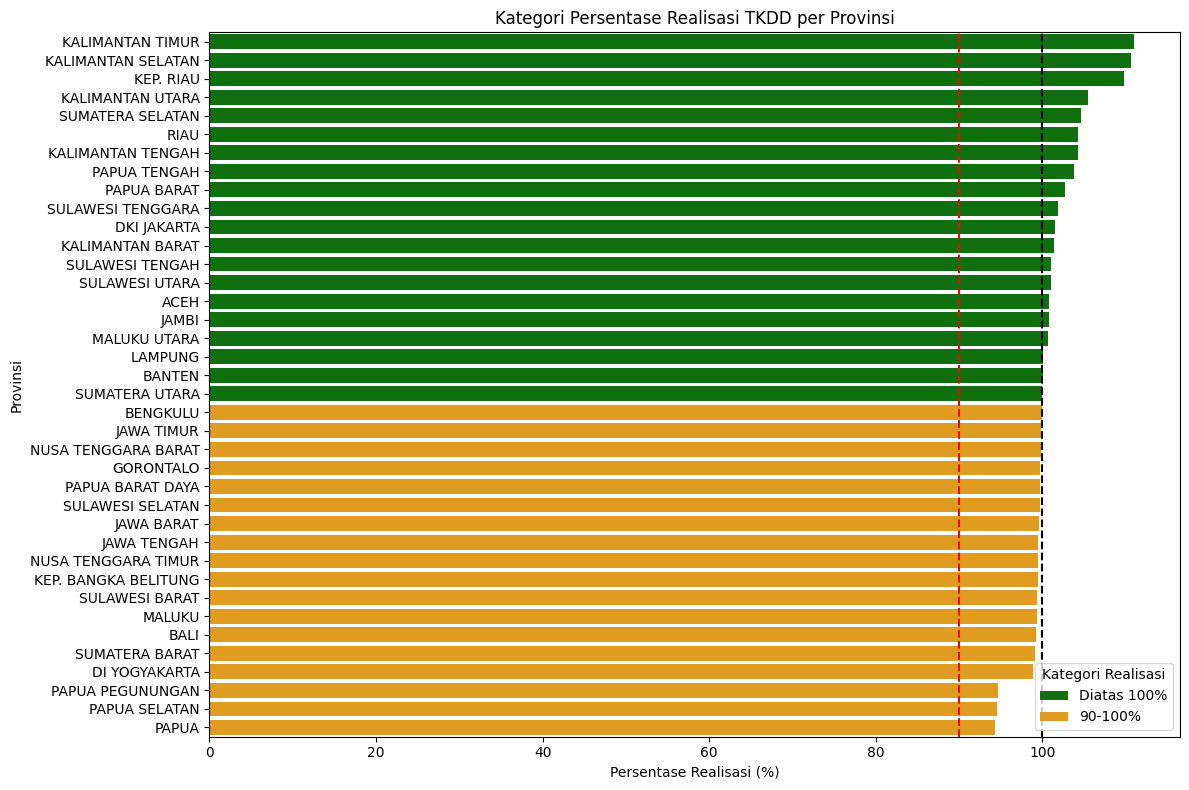

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=data_clean.sort_values('Persentase Realisasi (%)', ascending=False),
    x='Persentase Realisasi (%)',
    y='Provinsi',
    hue='Kategori Realisasi',
    dodge=False,
    palette={'Dibawah 90%':'red', '90-100%':'orange', 'Diatas 100%':'green'}
)
plt.axvline(90, color='red', linestyle='--')
plt.axvline(100, color='black', linestyle='--')
plt.xlabel('Persentase Realisasi (%)')
plt.ylabel('Provinsi')
plt.title('Kategori Persentase Realisasi TKDD per Provinsi')
plt.tight_layout()
plt.show()

- Berdasarkan data diatas, tidak ada provinsi yang realisasi TKDD nya dibawah 90%, realisasi TKDD terendah ada di Papua sekitar 94% yang menunjukkan hampir semua provinsi mampu menyerap anggaran TKDD dengan baik

## 3. Menganalisi faktor - faktor yang dapat mempengaruhi realisasi TKDD


In [63]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             38 non-null     float64
 2   Pagu TKDD                                                       38 non-null     float64
 3   Realisasi TKDD                                                  38 non-null     float64
 4   Jumlah Penduduk                                                 38 non-null     Int64  
 5   Anggaran APBN per kapita                                        38 non-null     float64
 6   Persentase Penduduk Miskin                                      38 non-null     float64
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga 

In [64]:
corr = data_clean.select_dtypes(include='number').corr()

# Drop Persentase Realisasi (%) karena hanya untuk menentukan efektivitas
# corr_realisasi = corr['Realisasi TKDD'].drop('Persentase Realisasi (%)')
# print(corr_realisasi.sort_values(ascending=False))
print(corr['Realisasi TKDD'].sort_values(ascending=False))

Realisasi TKDD                                                    1.000000
Pagu TKDD                                                         0.998199
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0.731865
Jumlah Penduduk                                                   0.676433
IPM                                                               0.267033
Persentase Realisasi (%)                                          0.211013
Produk Domestik Regional Bruto per Kapita HB                      0.079417
Laju Pertumbuhan PDRB atas dasar konstan 2010                    -0.029226
Anggaran APBN per kapita                                         -0.166444
Persentase Penduduk Miskin                                       -0.266174
Name: Realisasi TKDD, dtype: float64


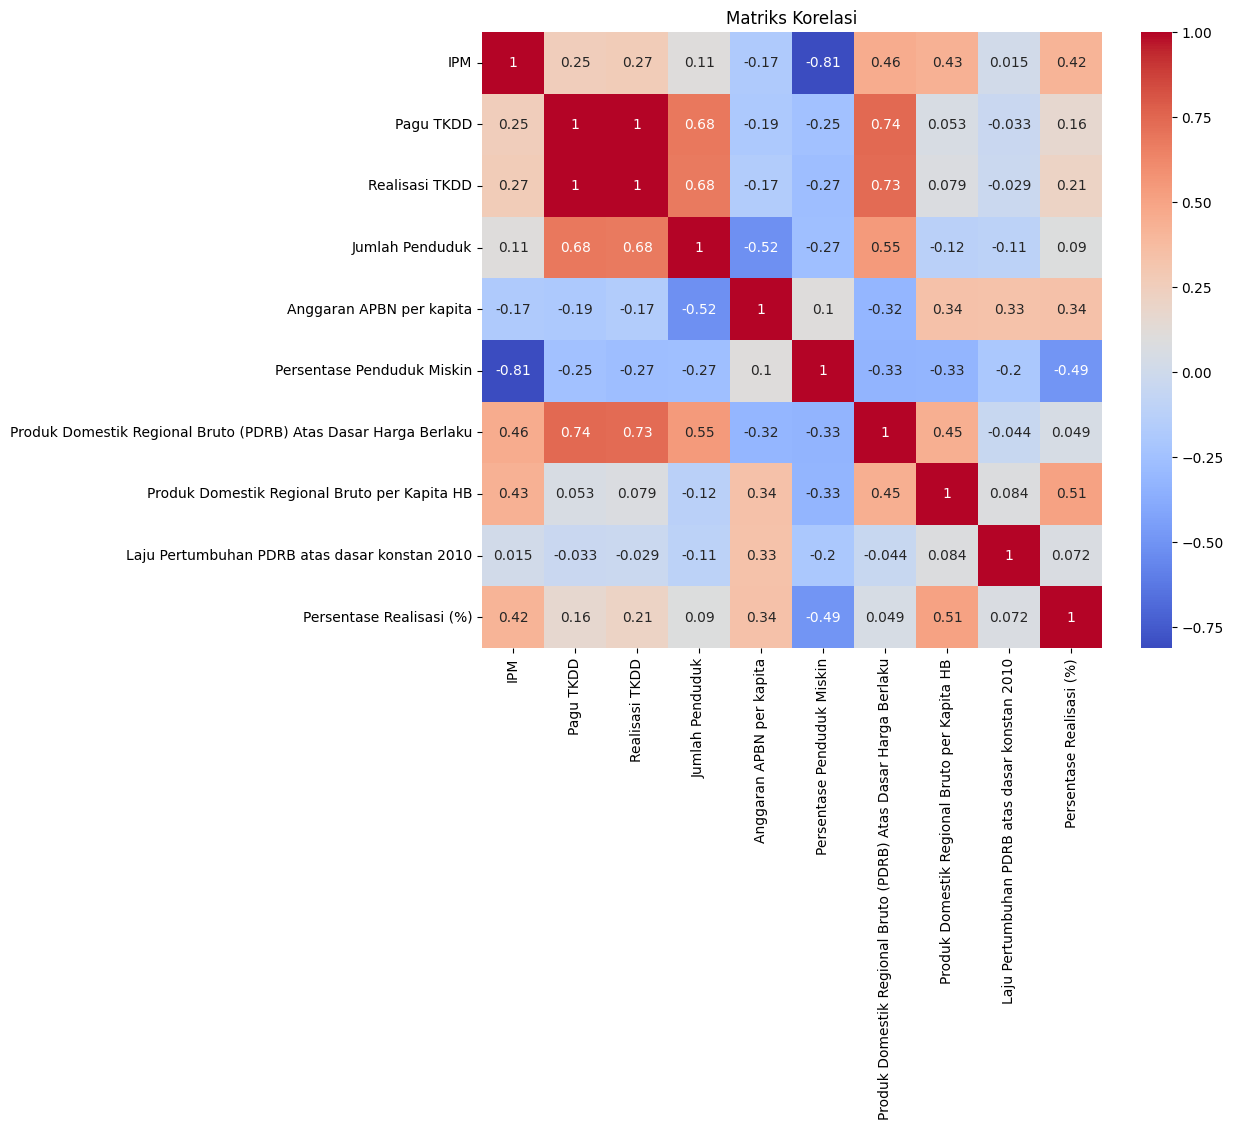

In [65]:
# analisis menggunakkan heatmap untuk memperjelas korelasi faktor terharap realisasi TKDD

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Faktor tertinggi yang mempengaruhi realisasi TKDD secara berurutan: 

1. Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku 
    - PDRB menentukan kemampuan fiskal daerah : PDRB menggambarkan kemampuan suatu wilayah dalam menghasilkan barang dan jasa, serta digunakan untuk menilai potensi ekonomi suatu wilayah. [https://satudata.sidoarjokab.go.id/assets/document/DC20230523031441.pdf]
2. Jumlah penduduk
    -  lebih banyak orang yang membutuhkan layanan publik seperti pendidikan, kesehatan, transportasi, dan perumahan. Oleh karena itu, pemerintah perlu mengalokasikan lebih banyak dana untuk memenuhi kebutuhan[https://online-journal.unja.ac.id/JES/article/download/2635/6333/27918#:~:text=penduduk%20yang%20tinggi%20tersebut%20telah%20mencerminkan%20tingkat,yang%20besar%20memerlukan%20fasilitas%2Dfasilitas%20umum%20yang%20lebih.]
3. IPM
    - Daerah yang mampu mengelola TKDD secara efektif untuk layanan publik, seperti pendidikan, kesehatan, dan infrastruktur, akan cenderung menunjukkan peningkatan IPM. [https://djpb.kemenkeu.go.id/portal/id/berita/lainnya/opini/4256-dau-yang-ditentukan-penggunaannya-solusi-untuk-pembangunan-daerah.html#:~:text=Sudah%20semestinya%20DAU%20digunakan%20untuk,untuk%20belanja%20modal%20Pemerintah%20Daerah.]
4. Produk Domestik Regional Bruto per Kapita HB
5. Laju Pertumbuhan PDRB atas dasar konstan 2010 
6. Persentase Penduduk Miskin
7. Anggaran APBN per kapita

## 4. Analisis hubungan realisasi TKDD dengan IPM


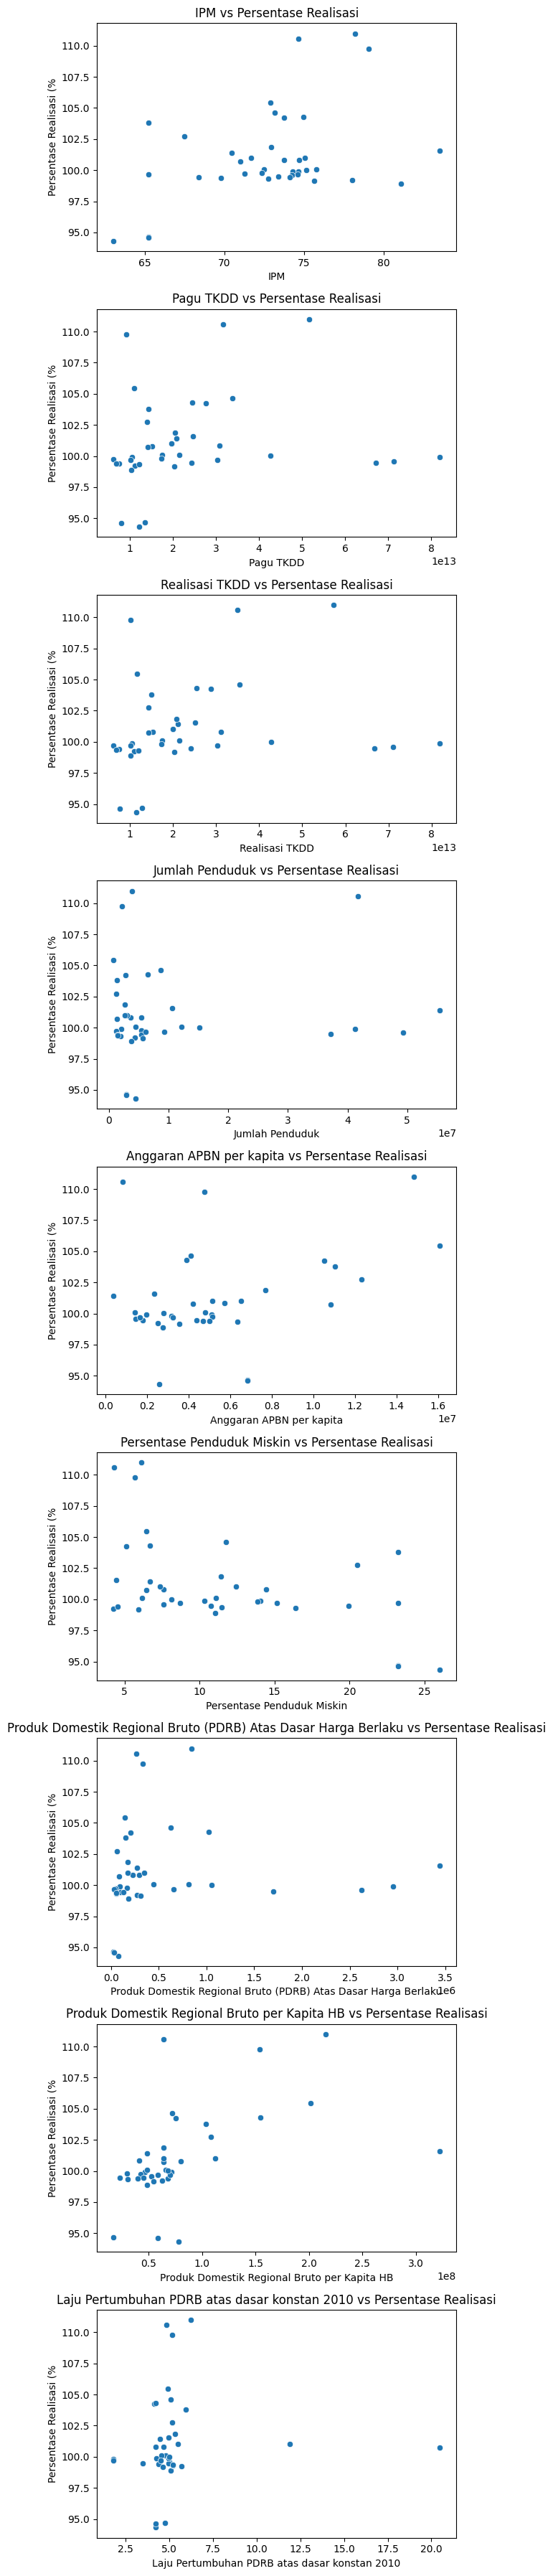

In [66]:
# Plot semua kolom numerik terhadap Realisasi TKDD
num_cols = data_clean.select_dtypes(include='number').columns
num_cols = [col for col in num_cols if col != 'Persentase Realisasi (%)']

n = len(num_cols)
plt.figure(figsize=(6, 4 * n))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n, 1, i)
    sns.scatterplot(x=data_clean[col], y=data_clean['Persentase Realisasi (%)'])
    plt.xlabel(col)
    plt.ylabel('Persentase Realisasi (%')
    plt.title(f'{col} vs Persentase Realisasi')

plt.tight_layout()
plt.show()

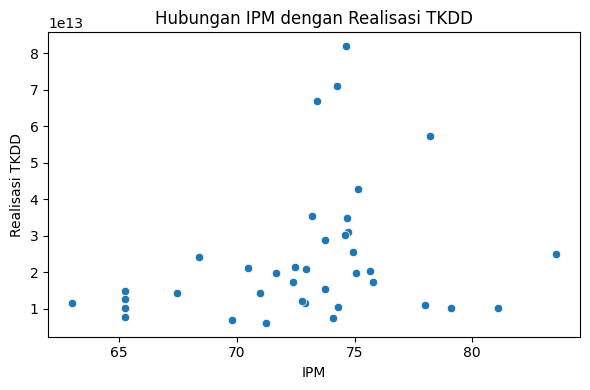

In [67]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data_clean['IPM'], y=data_clean['Realisasi TKDD'])
plt.xlabel('IPM')
plt.ylabel('Realisasi TKDD')
plt.title('Hubungan IPM dengan Realisasi TKDD')
plt.tight_layout()
plt.show()

# menunjukkan hubungan yang lemah karena titik tersebar acak 

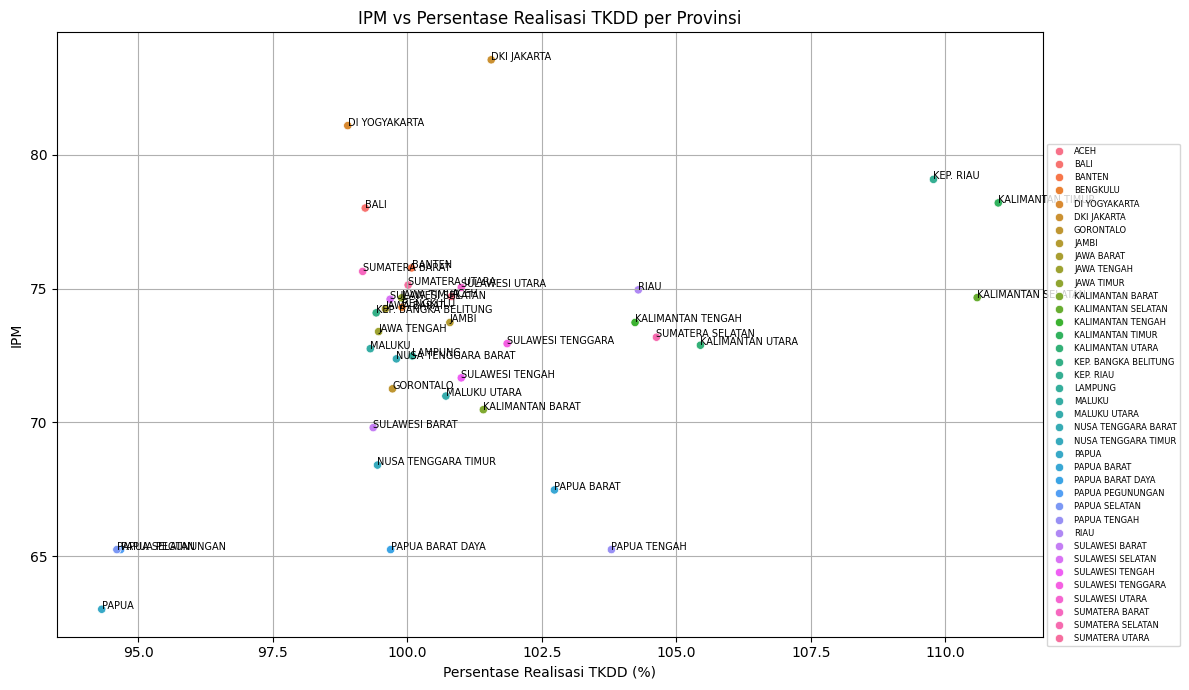

In [85]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=data_clean, x='Persentase Realisasi (%)', y='IPM', hue='Provinsi')

for i in range(data_clean.shape[0]):
    plt.text(
        data_clean['Persentase Realisasi (%)'].iloc[i],
        data_clean['IPM'].iloc[i],
        data_clean['Provinsi'].iloc[i],
        fontsize=7
    )

plt.title('IPM vs Persentase Realisasi TKDD per Provinsi')
plt.xlabel('Persentase Realisasi TKDD (%)')
plt.ylabel('IPM')
plt.grid(True)

# 👉 Pindahkan legend ke luar kanan
plt.legend(loc='center left', bbox_to_anchor=(1, 0.4), fontsize=6)

plt.tight_layout()
plt.show()


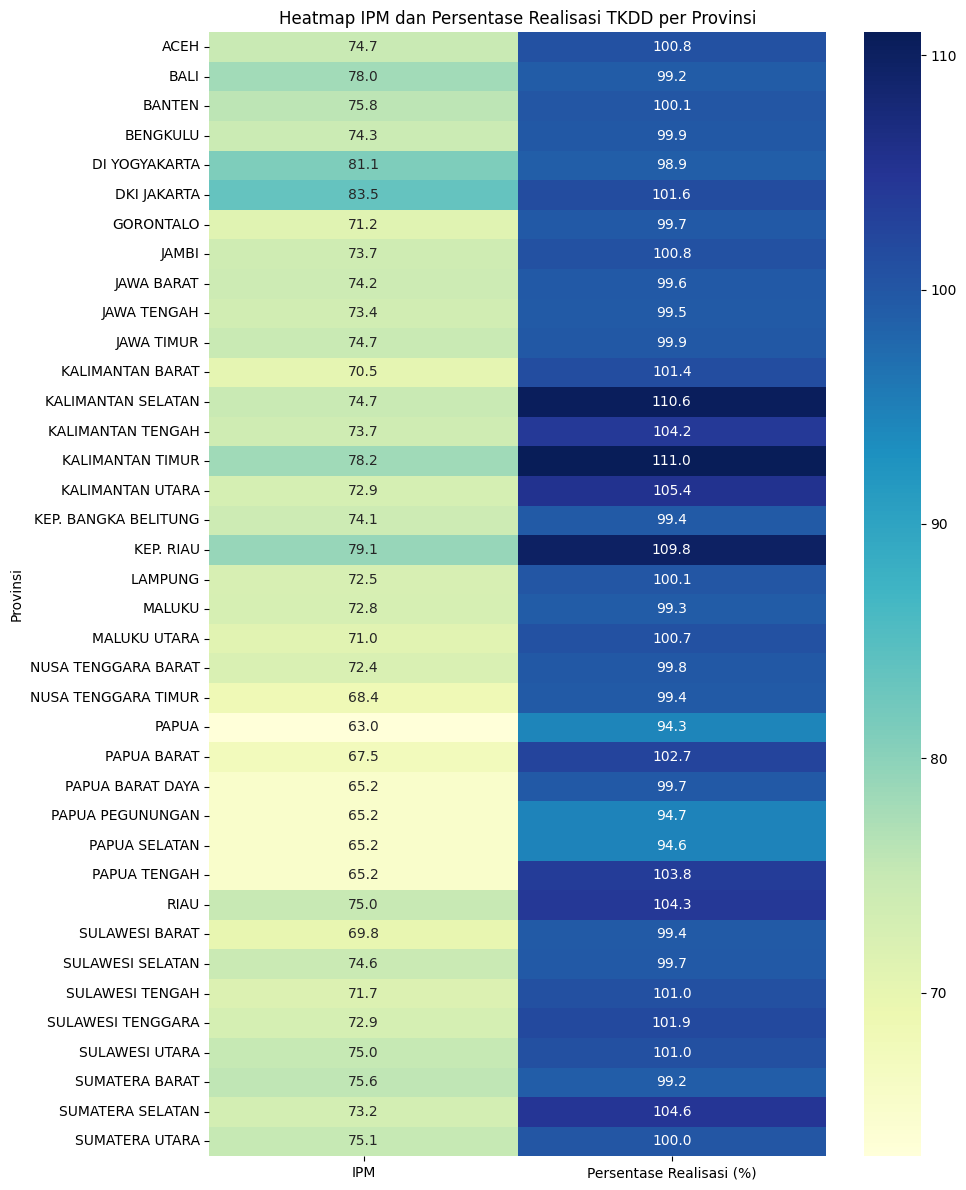

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot untuk heatmap
# untuk menunjukkan pola antar provinsi (perbandingan antara IPM dengan persentase realisasi TKDD per provinsi)
heat_df = data_clean.pivot_table(
    index='Provinsi',
    values=['IPM', 'Persentase Realisasi (%)']
)

plt.figure(figsize=(10, 12))
sns.heatmap(heat_df, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Heatmap IPM dan Persentase Realisasi TKDD per Provinsi')
plt.tight_layout()
plt.show()


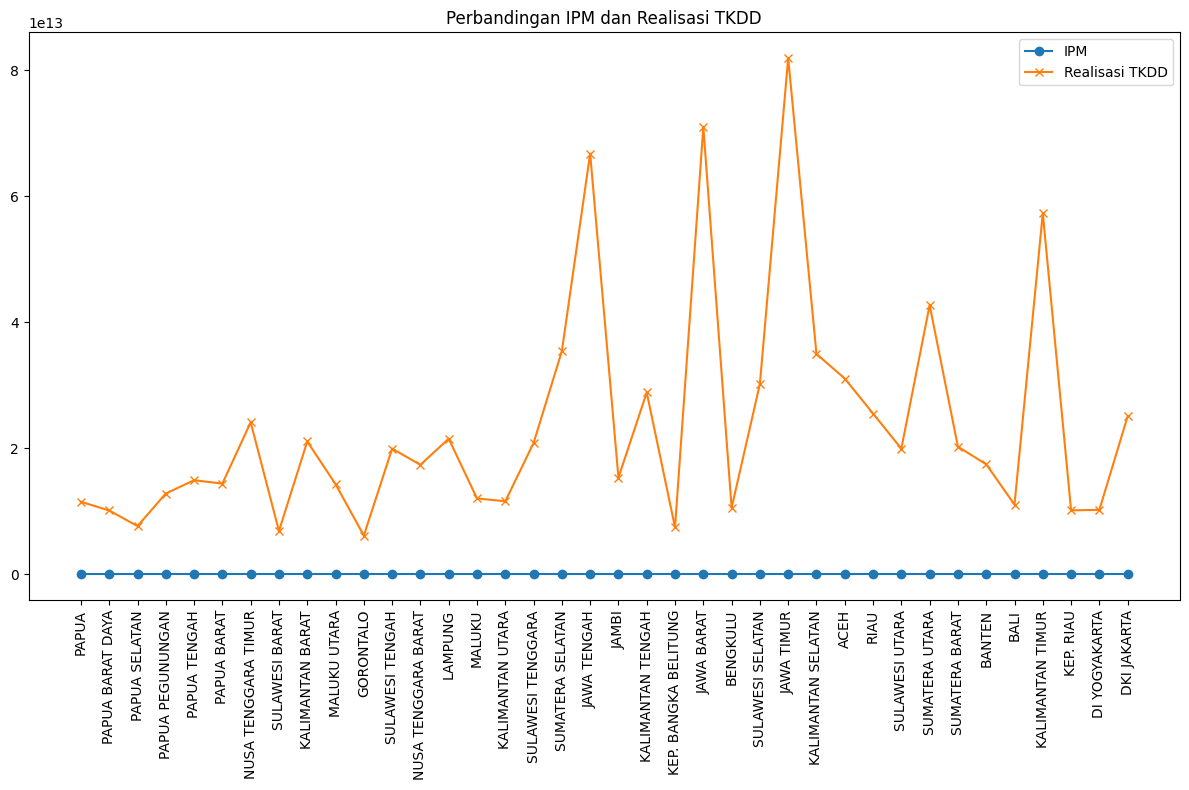

In [86]:
df_sorted = data_clean.sort_values('IPM')
plt.figure(figsize=(12, 8))

plt.plot(df_sorted['Provinsi'], df_sorted['IPM'], label='IPM', marker='o')
plt.plot(df_sorted['Provinsi'], df_sorted['Realisasi TKDD'], label='Realisasi TKDD', marker='x')

plt.xticks(rotation=90)
plt.legend()
plt.title('Perbandingan IPM dan Realisasi TKDD')
plt.tight_layout()
plt.show()


In [68]:
korelasi = data_clean['IPM'].corr(data_clean['Persentase Realisasi (%)'])
print(f'Korelasi antara IPM dan Persentase Realisasi TKDD: {korelasi:.2f}')

Korelasi antara IPM dan Persentase Realisasi TKDD: 0.42


- hubungan antara realisasi TKDD dengan IPM(Index Pembangunan Manusia) adalah hubungan positif lemah (cukup jauh dari +1) artinya jika realisasi TKDD meningkat maka IPM akan meningkat juga, tetapi peningkatan realisasi TKDD tidak menunjukkan peningkatan yang signifikan pada IPM. Artinya tingginya realisasi TKDD tidak memberi pengaruh signifikan ke pencapaian pembangunan manusia di wilayah tersebut

- Salah satu faktor keberhasilan pembangunan adalah IPM(Index Pembangunan Maunsia) terkait dengan kesejahteraan masyarakat. Berdasarkan data, dana Pagu kurang efektif **meningkatkan kesejahteraan masyarakat** karena meski realisasi TKDD mendekati pagu TKDD tetapi tidak memberikan pengaruh secara signifikan ke IPM (Indeks Pembangunan Manusia)

# REKOMENDASI KEBIJAKAN

Rekomendasi kebijakan 
 1. Prioritaskan belanja modal yang berdampak langsung ke IPM
Sumber daya publik yang besar harus diarahkan ke sektor yang langsung mempengaruhi pendidikan, kesehatan, dan daya beli, yaitu tiga komponen utama IPM. 
Pembangunan infrastruktur seperti sekolah, puskesmas, sanitasi, dan air bersih akan memberi dampak jangka panjang terhadap kualitas SDM.

2. Gunakan IPM sebagai indikator utama alokasi TKDD dan PAD
Saat ini banyak alokasi anggaran didasarkan pada besar kecilnya wilayah, bukan kinerja pembangunan manusia. Dengan menjadikan IPM sebagai indikator utama alokasi, daerah akan termotivasi untuk fokus pada hasil, bukan hanya penyerapan anggaran

3. Pantau dan ukur output/outcome, bukan hanya serapan input
Banyak proyek daerah dinilai “berhasil” hanya karena dananya habis, padahal tidak berdampak nyata. Fokus ke hasil akan memaksa perencanaan yang lebih matang dan pelaksanaan yang lebih bertanggung jawab.

https://www.scribd.com/document/743688007/Kajian-IlmiahKinerja-Keuangan-terhadap-IPM-Siti-dkk
